# Proyecto 7 - Explorando factores de comportamiento en NovaRetail+


NovaRetail+ es una plataforma de comercio electrónico en Latinoamérica con millones de usuarios.

Para el cierre de 2024, el equipo de **Crecimiento y retención** tiene como objetivo responder:

**¿Qué factores del comportamiento del cliente están más fuertemente asociados con el ingreso anual generado?**

> Este proyecto es un análisis **correlacional** (exploratorio).  
> **Correlación ≠ causalidad.**

## Sección 1 - Cargar y explorar el dataset

En esta sección validamos:
- que el dataset cargue correctamente
- tipos de datos
- valores faltantes / rangos generales

Antes de correlacionar, primero entendemos el “terreno”.

In [1]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Cargar Dataset

In [2]:
# Cargar el dataset y explorar datos
df = pd.read_csv('/datasets/novaretail_comportamiento_clientes_2024.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 15000 non-null  object 
 1   edad                       15000 non-null  float64
 2   nivel_ingreso              15000 non-null  float64
 3   visitas_mes                15000 non-null  int64  
 4   compras_mes                15000 non-null  int64  
 5   gasto_publicidad_dirigida  15000 non-null  float64
 6   satisfaccion               15000 non-null  float64
 7   miembro_premium            15000 non-null  int64  
 8   abandono                   15000 non-null  int64  
 9   tipo_dispositivo           15000 non-null  object 
 10  region                     15000 non-null  object 
 11  ingreso_anual              15000 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 1.4+ MB


#### Descripción del conjunto de datos

El dataset contiene las siguientes columnas:

- `id_cliente` — Identificador único del cliente.
- `edad` — Edad del cliente.
- `nivel_ingreso` — Ingreso anual estimado del cliente.
- `visitas_mes` — Número de visitas a la aplicación o sitio web durante el mes.
- `compras_mes` — Número de compras realizadas en el mes.
- `gasto_publicidad_dirigida` — Gasto en anuncios asignado al usuario.
- `satisfaccion` — Calificación de satisfacción del cliente en una escala del 1 al 5.
- `miembro_premium` — Indica si el cliente tiene suscripción premium (1) o no (0).
- `abandono` — Indica si el cliente abandonó la plataforma (1) o no (0).
- `tipo_dispositivo` — Tipo de dispositivo utilizado por el cliente (móvil, escritorio o tablet).
- `region` — Región geográfica del cliente (norte, sur, oeste o este).
- `ingreso_anual` — Ingreso anual generado por el cliente para la empresa.

La métrica principal de análisis es `ingreso_anual`, utilizada para evaluar el impacto económico de los clientes.


In [3]:
# mostrar las primeras 5 filas
df.head(5)

,id_cliente,edad,nivel_ingreso,visitas_mes,compras_mes,gasto_publicidad_dirigida,satisfaccion,miembro_premium,abandono,tipo_dispositivo,region,ingreso_anual
0,CL-100000,44.0,28565.77,9,1,31.36,3.9,0,0,móvil,norte,23.22
1,CL-100001,36.0,29673.44,11,3,24.66,3.7,0,0,tablet,sur,93.47
2,CL-100002,46.0,30642.95,9,0,0.00,2.9,0,0,móvil,este,0.00
3,CL-100003,56.0,39468.61,8,0,6.81,3.1,0,0,móvil,este,0.00
4,CL-100004,35.0,22527.83,9,2,26.49,2.3,0,0,móvil,sur,33.76


## Sección 2 - Preparar datos y documentar supuestos

### Exploración y Limpieza

💡
Después de analizar la información anterior, completa la siguiente sección.  
- Si aplica, señala la o las columnas que requieren algun cambio

Recuerda eliminar este bloque de texto antes de subir el proyecto a tu portafolio.


#### Exploración inicial de los datos
El conjunto de datos contiene **15,000 registros** y **12 columnas**, sin valores nulos.

**Variables numéricas**  
Se identifican las siguientes columnas numéricas:
- `edad`
- nivel_ingreso
- visitas_mes
- compras_mes
- gasto_publicidad_dirigida
- satisfaccion
- miembro_premium
- abandono
- ingreso_anual

La mayoría de estas variables presentan tipos de datos adecuados.  
La columna ... .


**Variables binarias**  
Las siguientes columnas representan variables binarias:
- `miembro_premium`
- `abandono`

Ambas están codificadas como 0 y 1, **no requieren transformación adicional**.

**Variables categóricas**  
Se identifican las siguientes columnas categóricas:
- `id_cliente`
- `tipo_dispositivo`
- `region`

Estas variables están correctamente definidas y no requieren transformación adicional.

In [4]:
# Corregir el tipo de dato
df['edad']=df['edad'].astype('Int64')

In [5]:
# verificar cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 15000 non-null  object 
 1   edad                       15000 non-null  Int64  
 2   nivel_ingreso              15000 non-null  float64
 3   visitas_mes                15000 non-null  int64  
 4   compras_mes                15000 non-null  int64  
 5   gasto_publicidad_dirigida  15000 non-null  float64
 6   satisfaccion               15000 non-null  float64
 7   miembro_premium            15000 non-null  int64  
 8   abandono                   15000 non-null  int64  
 9   tipo_dispositivo           15000 non-null  object 
 10  region                     15000 non-null  object 
 11  ingreso_anual              15000 non-null  float64
dtypes: Int64(1), float64(4), int64(4), object(3)
memory usage: 1.4+ MB


#### Explorar variables numéricas

In [6]:
# Estadísticas descriptivas de variables numéricas


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.  
Incluye qué ves (resalta un detalle relevante por columna)

Diagnóstico inicial de variables numéricas

- `edad` —tenía tipo flotante y fue convertido a edad
- 

#### Explorar variables binarias

In [7]:
# Verificar que cada columna tenga únicamente dos valores posibles
df['miembro_premium'].value_counts()


0    12911
1     2089
Name: miembro_premium, dtype: int64

In [8]:
df['abandono'].value_counts()

0    12739
1     2261
Name: abandono, dtype: int64

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.  
Incluye qué ves (resalta un detalle relevante por columna)

Diagnóstico inicial de variables binarias

- `miembro_premium` — 12911 como no miembros y 2089 como miembor premium
- `abandono` — 12739 abandonos y 2261 que permanecen

#### Explorar variables categóricas

In [9]:
# Explorar variables categóricas y cómo se distribuyen
df['region'].value_counts()

norte    4395
oeste    3810
sur      3726
este     3069
Name: region, dtype: int64

In [10]:
df['tipo_dispositivo'].value_counts()

móvil         9818
escritorio    3720
tablet        1462
Name: tipo_dispositivo, dtype: int64

In [11]:
# Verificar el número de valores únicos por variable categórica
df['tipo_dispositivo'].unique()

array(['móvil', 'tablet', 'escritorio'], dtype=object)

In [12]:
df['region'].unique()

array(['norte', 'sur', 'este', 'oeste'], dtype=object)

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.  
Incluye qué ves (resalta un detalle relevante por columna)

Diagnóstico inicial de variables categóricas

- `tipo_dispositivo` — prevalece el tipo móvil con 9818, luego escritorio y or último tablet
-  'region' - prevalece noret con 4395, luego oeste, sur y este

### Supuestos

- El análisis se realiza utilizando **todo el conjunto de datos disponible**.
- Los datos no presentan errores y están correctamente tipificados.
- Se utilizan distintos coeficientes según el tipo de variable:
  - **Pearson** asume relaciones lineales entre variables numéricas.
  - **Spearman** evalúa relaciones monótonas y no requiere normalidad.
  - **Punto biserial** se usa para relaciones numérica–binaria.
  - **Cramér (V)** se usa para asociaciones entre variables categóricas.

**Supuesto central:**  
Este análisis identifica relaciones entre variables o segmentos, pero no prueba causalidad.

## Sección 3 - Visualización de relaciones

Observamos cómo se relacionan las variables numéricas.

### Heatmap

In [13]:
# Visualizar la matriz de correlación para identificar relaciones
corr_df=df.corr()
corr_df

,edad,nivel_ingreso,visitas_mes,compras_mes,gasto_publicidad_dirigida,satisfaccion,miembro_premium,abandono,ingreso_anual
edad,1.000000,-0.009003,0.004998,0.014971,0.000062,-0.006963,0.004605,-0.011500,0.017496
nivel_ingreso,-0.009003,1.000000,0.001060,0.007309,0.016834,0.002301,-0.005598,0.005870,0.017446
visitas_mes,0.004998,0.001060,1.000000,0.353844,0.578947,-0.003179,-0.012657,-0.008943,0.337147
compras_mes,0.014971,0.007309,0.353844,1.000000,0.207528,-0.003542,0.003431,0.008291,0.967149
gasto_publicidad_dirigida,0.000062,0.016834,0.578947,0.207528,1.000000,-0.013175,0.002721,-0.004586,0.197483
satisfaccion,-0.006963,0.002301,-0.003179,-0.003542,-0.013175,1.000000,0.025734,-0.023833,0.056171
miembro_premium,0.004605,-0.005598,-0.012657,0.003431,0.002721,0.025734,1.000000,-0.120488,0.093099
abandono,-0.011500,0.005870,-0.008943,0.008291,-0.004586,-0.023833,-0.120488,1.000000,-0.002824
ingreso_anual,0.017496,0.017446,0.337147,0.967149,0.197483,0.056171,0.093099,-0.002824,1.000000


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.    
Incluye qué ves


Observaciones generales (Heatmap)  
- Se observa que la columna toral ingreso_manual tiene una fuerte correlación positiva con compras_mes aunque podría ser redundante, pues la diferencia es que una marca periodo anual y la otra mensual. La columna visitas_mes tiene una correlación significativa con ingreso anual, asi como tambien con compras_mes y gasto_publicidad_dirigida, estas dos ultimas poseen una correlación a tomar en cuenta. La columna satisfacción señala correlaciones irrelevantes y negativas con varias columnas, así como la columna abandono.


Observaciones respecto a `ingreso_anual`  
- Presenta una correlacion positiva con compras_mes, así como con ingreso_anual, y gasto_publicidad_dirigida.


### Scatterplot general

Con base en los resultados del análisis de correlación, evalúa si es necesario generar un *scatterplot* general.

- **Si decides incluirlo**:
  - Genera el gráfico.
  - Describe brevemente qué patrones o tendencias observas.

- **Si decides no incluirlo**:
  - Explica por qué. No es necesario incluir el scatter plot general, pues las columnas totales son ingreso_anual, compras_mes, gasto_publicidad_dirigida  son relevantes; sin embargo se plasmará por si mas adelnate se usa como consulta

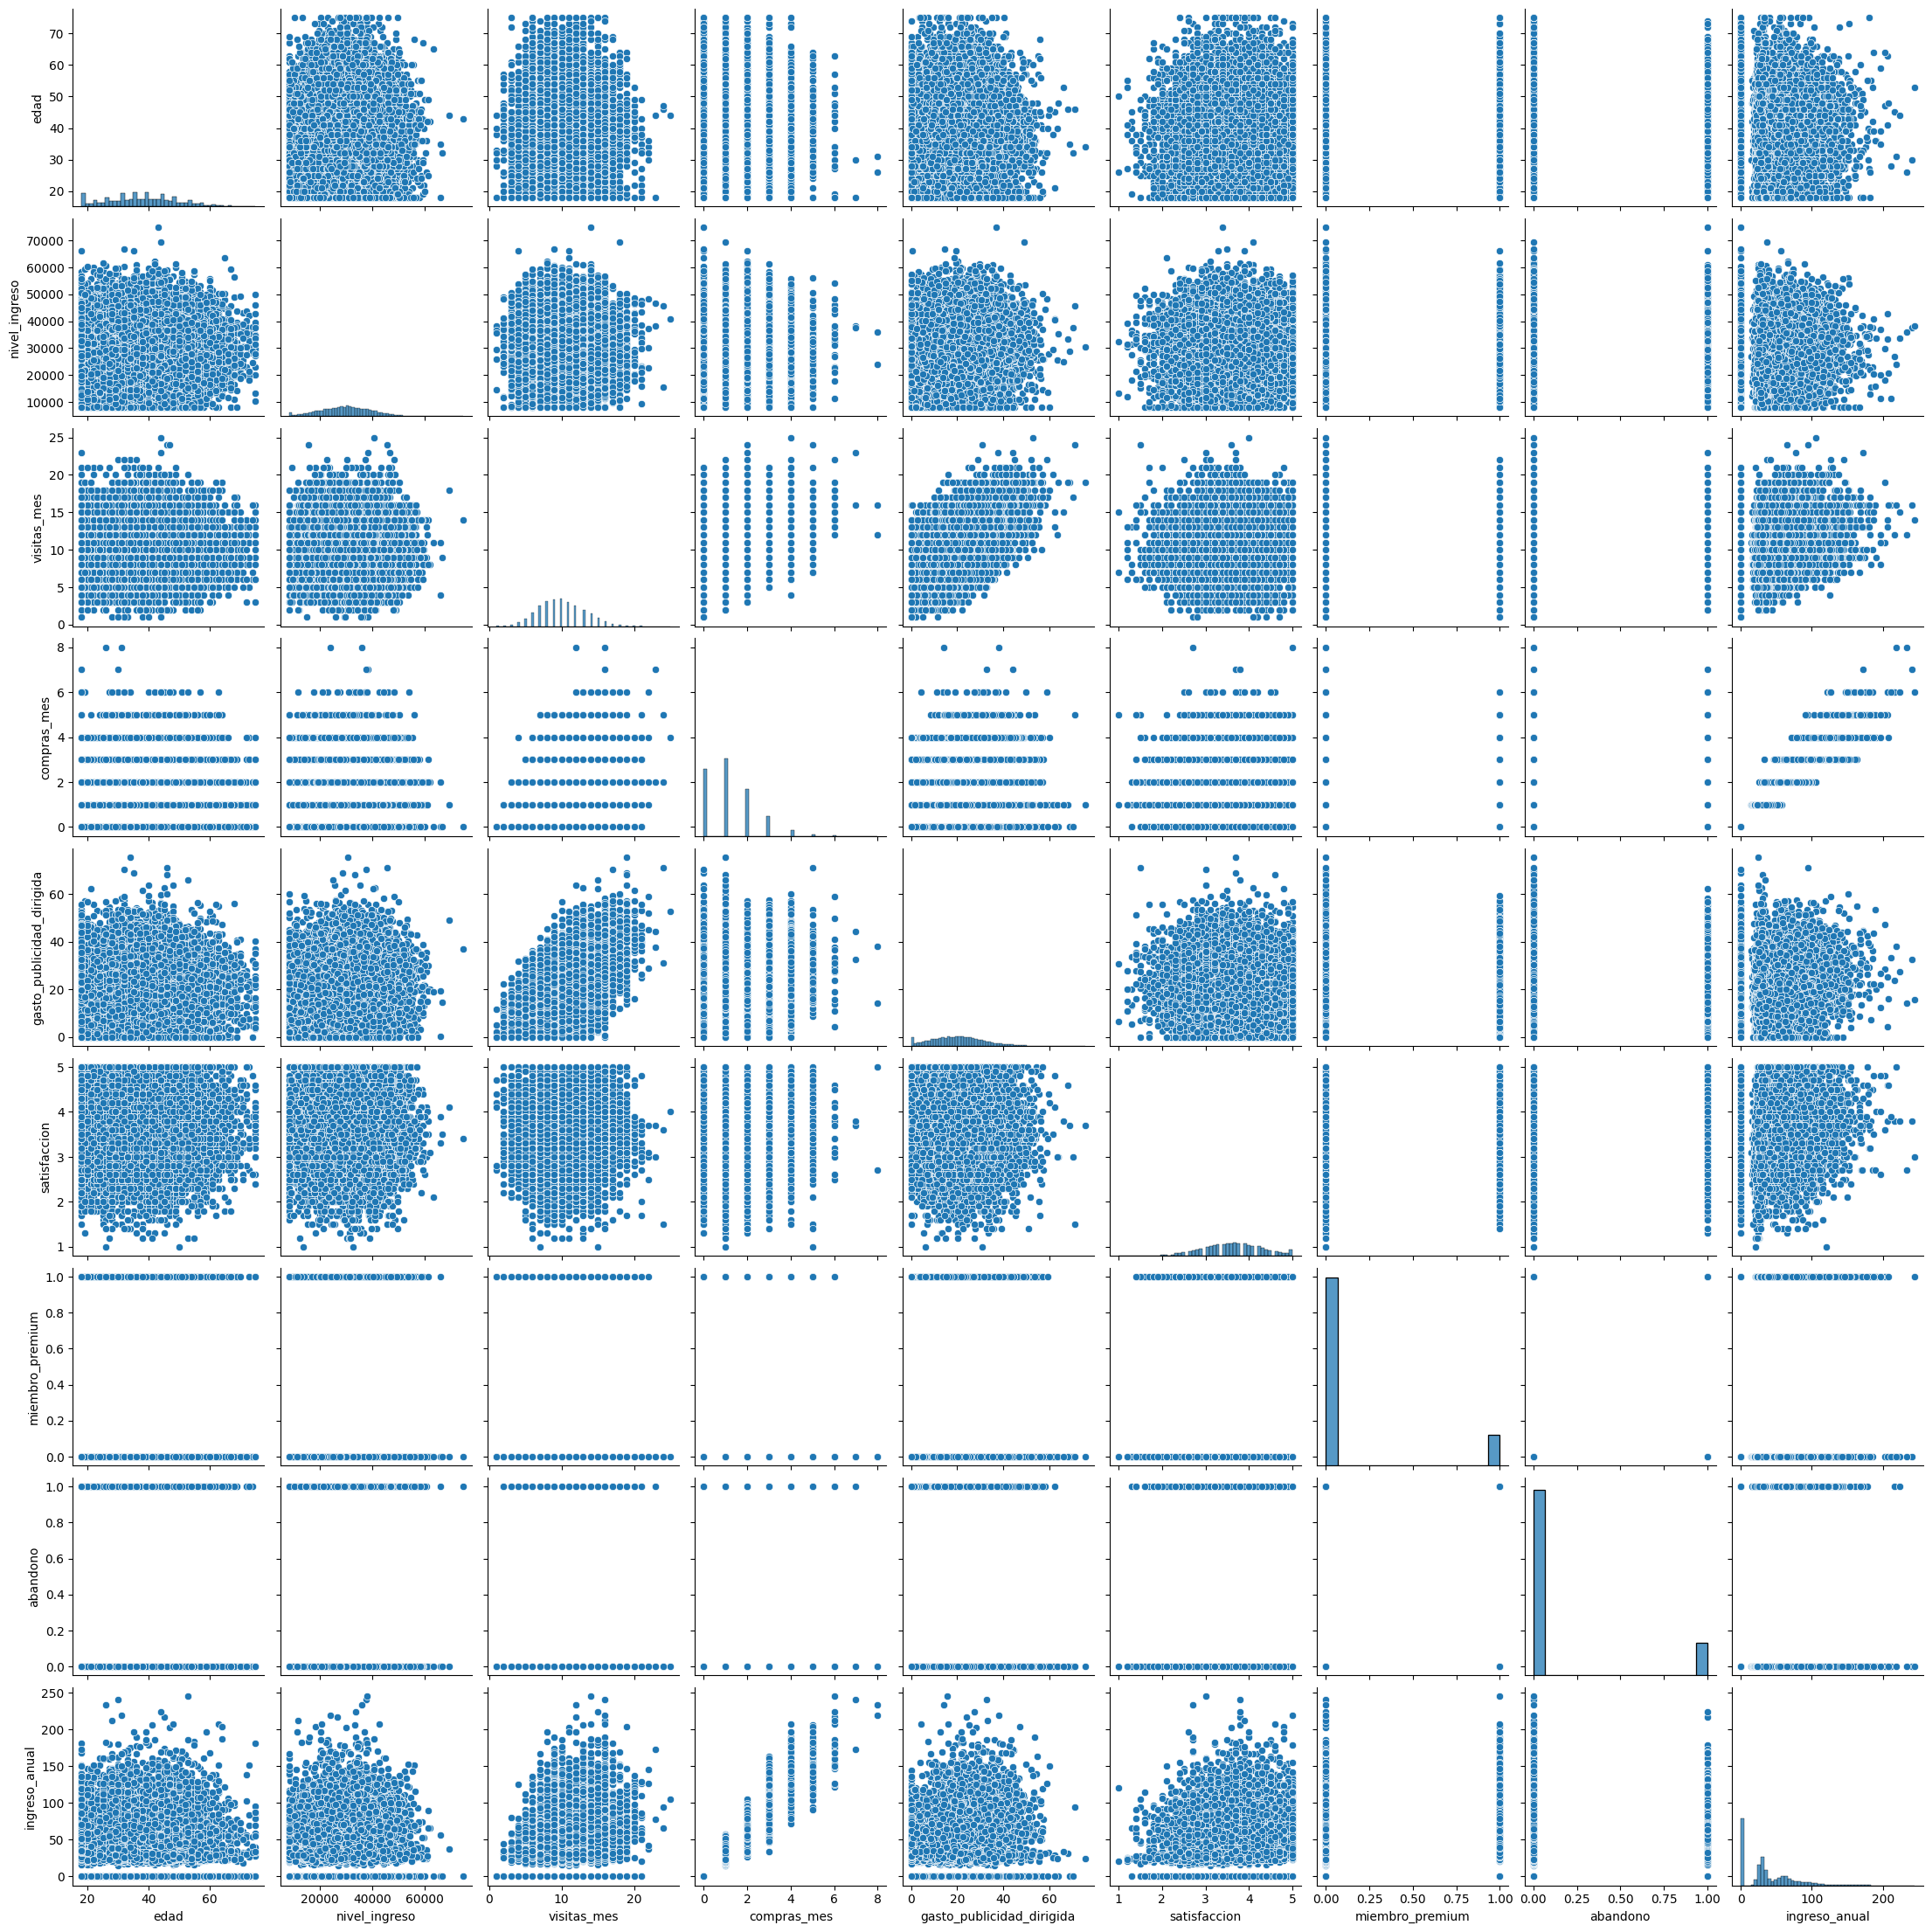

In [14]:
sns.pairplot(df)

### Scatterplot para pares clave

<AxesSubplot:xlabel='ingreso_anual', ylabel='visitas_mes'>

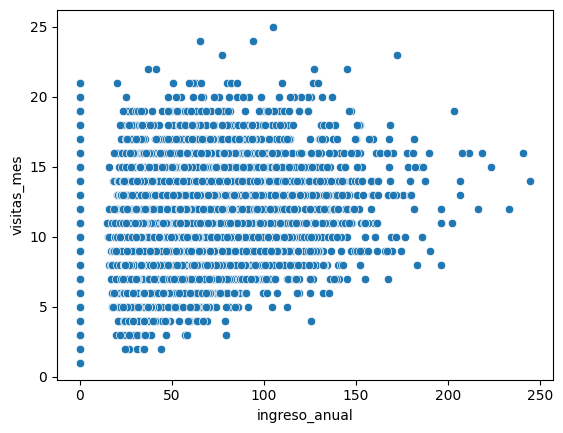

In [15]:
# Visualizar pares de variables con relaciones moderadas o fuertes
sns.scatterplot(data=df, x='ingreso_anual',y='visitas_mes')

<AxesSubplot:xlabel='ingreso_anual', ylabel='gasto_publicidad_dirigida'>

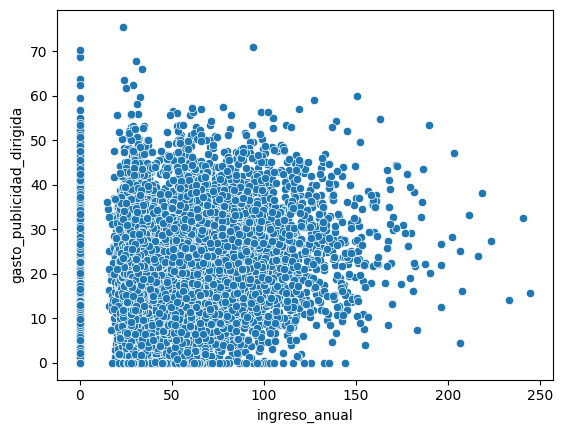

In [16]:
sns.scatterplot(data=df, x='ingreso_anual',y='gasto_publicidad_dirigida')


<AxesSubplot:xlabel='ingreso_anual', ylabel='ingreso_anual'>

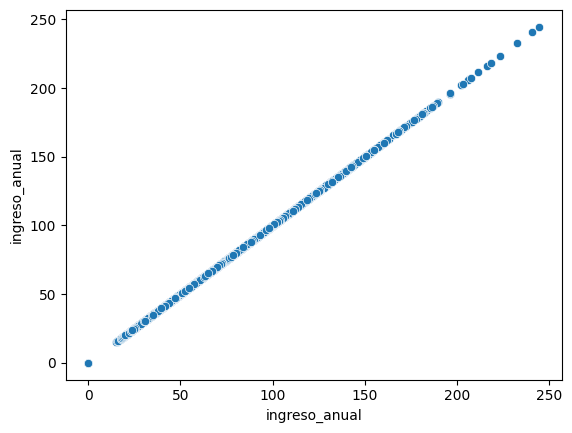

In [17]:
sns.scatterplot(data=df, x='ingreso_anual',y='ingreso_anual')

<AxesSubplot:xlabel='compras_mes', ylabel='gasto_publicidad_dirigida'>

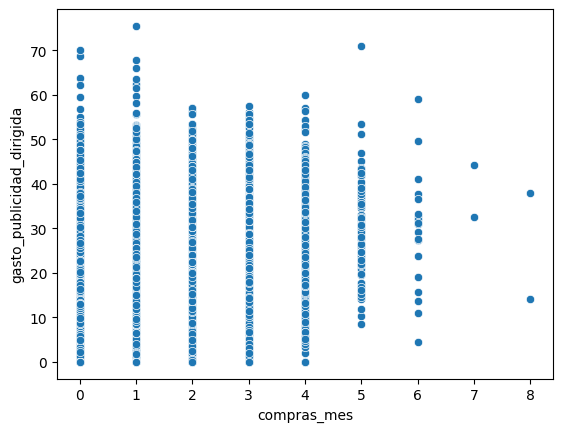

In [18]:
sns.scatterplot(data=df, x='compras_mes',y='gasto_publicidad_dirigida')

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.   
Incluye qué ves: dirección (positiva o negativa), dispersión (alta, media, baja), presencia de outliers y posible colinealidad.


Observaciones iniciales (Scatterplot)

**ingreso_anual vs compras_mes**
- Dirección positiva
- Correlacin fuerte, posible colinealidad

**ingreso_anual vs gasto_publicidad_dirigida**
- Dirección positiva
- Correlación débil

**ingreso_anual vs visitas_mes**
- Dirección positiva
- Correlación a tomar en cuenta, pues es significativa (0.33)

**compras_mes vs gasto_publicidad_dirigida**
- Dirección positiva
- Correlación algo relevante (0.2)

## Sección 4 - Coeficientes de correlación y evidencia numérica

En esta sección, se reportan coeficientes que respaldan los patrones
observados visualmente, utilizando el método adecuado según el tipo
de variables.

### Pearson / Spearman

In [19]:
# Calcular correlación entre variables relevantes
df['ingreso_anual'].corr(df['compras_mes'],method='pearson')

0.9671485435708566

In [20]:
# Calcular correlación entre variables relevantes
df['ingreso_anual'].corr(df['compras_mes'],method='spearman')

0.9674824920326731

In [21]:
df['ingreso_anual'].corr(df['gasto_publicidad_dirigida'],method='pearson')

0.1974827018234103

In [22]:
df['ingreso_anual'].corr(df['gasto_publicidad_dirigida'],method='spearman')

0.18499874477115502

In [23]:
df['ingreso_anual'].corr(df['visitas_mes'],method='pearson')

0.33714664324987453

In [24]:
df['ingreso_anual'].corr(df['visitas_mes'],method='spearman')

0.3209536973769648

In [25]:
df['compras_mes'].corr(df['gasto_publicidad_dirigida'],method='pearson')

0.20752786826577177

In [26]:
df['compras_mes'].corr(df['gasto_publicidad_dirigida'],method='spearman')

0.1925114133543284

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.  
Incluye qué ves: dirección, magnitud y posible colinealidad.


Observaciones de correlación

**var1 vs var2**
- Correlación ingreso_anual vs compras_mes: posible colinealidad, de ser así, descartar esta relación, ya que es redundante: dirección positiva, 0.96

**var2 vs var3**
- Correlación ingreso_anual vs gasto_publicidad_dirigida: relación debil, alrededor de 0.19, positiva

- Correlación ingreso_anual vs vistas_mes: positiva, 0.33, a tomarse en cuenta

- Correlación compras_mes vs gasto_publicidad_positiva: 0.20, positiva

### Punto-biserial

In [27]:
# Calcular correlación entre variables relevantes
df.head()

,id_cliente,edad,nivel_ingreso,visitas_mes,compras_mes,gasto_publicidad_dirigida,satisfaccion,miembro_premium,abandono,tipo_dispositivo,region,ingreso_anual
0,CL-100000,44,28565.77,9,1,31.36,3.9,0,0,móvil,norte,23.22
1,CL-100001,36,29673.44,11,3,24.66,3.7,0,0,tablet,sur,93.47
2,CL-100002,46,30642.95,9,0,0.00,2.9,0,0,móvil,este,0.00
3,CL-100003,56,39468.61,8,0,6.81,3.1,0,0,móvil,este,0.00
4,CL-100004,35,22527.83,9,2,26.49,2.3,0,0,móvil,sur,33.76


In [28]:
# A considerar: miembro_premium vs ingreso_anual
df['miembro_premium'].value_counts()

0    12911
1     2089
Name: miembro_premium, dtype: int64

In [29]:
from scipy.stats import pointbiserialr
pointbiserialr( df["miembro_premium"], df["ingreso_anual"] )

SignificanceResult(statistic=0.0930994396198015, pvalue=3.0943076155242597e-30)

In [30]:
# abandono vs ingreso_anual
df['abandono'].value_counts()

0    12739
1     2261
Name: abandono, dtype: int64

In [31]:
pointbiserialr( df["abandono"], df["ingreso_anual"] )

SignificanceResult(statistic=-0.002823934021617148, pvalue=0.7294691719078393)

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.   
Incluye qué ves: dirección (positiva o negativa), magnitud (alta, media, baja).

Observaciones Punto-biserial

**var1 vs var2**
- Relación miembro_premium vs ingreso_anual: correlación positiva, pero muy pequeña (0.09)

**var2 vs var3**
- Relación abandono vs ingeso_anual: correlacion negativa, pero demasiado pequeña (-0.002)

### V de Cramér

In [32]:
# Función para calcular V de Cramér
# Correlación tipo_dispositivo vs region

In [33]:
# Aplicar V de Cramér en variables relevantes
# Importar librería:
from scipy.stats import chi2_contingency
# Crear tabla de contingencia:
tabla_tp_r = pd.crosstab(df['tipo_dispositivo'],df['region'])
tabla_tp_r

region,este,norte,oeste,sur
tipo_dispositivo,,,,
escritorio,766,1125,935,894
móvil,2003,2843,2489,2483
tablet,300,427,386,349


In [34]:
#Cálculo de chi2
chi2, _, _, _ = chi2_contingency(tabla_tp_r)
chi2

4.596697852095489

In [35]:
import numpy as np
# Cálculos complementarios:
n = tabla_tp_r.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(tabla_tp_r.shape) -1)))
cramers_v 

0.012378338407739397

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.
Incluye qué ves

Observaciones V de Cramér
]
La relación entre región y tipo_dispositivo aunque positiva, es demasiado débil

## Sección 5 - Interpretación de resultados para el negocio

Cada hallazgo  debe incluir:
1) Evidencia visual (si aplica)
2) Evidencia numérica  
3) Interpretación (no causal)  
4) No podemos afirmar
5) Implicación de negocio

---

✍️ **Hallazgos**: Completa los siguientes bloques.   
Si lo crees necesario, puedes agregar mas hallazgos.  

Recuerda eliminar este bloque de texto antes de incluir el proyecto en tu portafolio.

In [37]:
df.groupby('tipo_dispositivo')['ingreso_anual'].mean()

tipo_dispositivo
escritorio    36.423516
móvil         36.588418
tablet        37.067120
Name: ingreso_anual, dtype: float64

### Hallazgo 1 — 

**Evidencia visual: el ingreso_anual tiene colinealidad con compras_mes, y una correlación significativa con visitas_mes, y en menor medida con gasto_publicidad_dirigida
**Evidencia numérica: las métricas confirman lo anterior pues la correlación con compras_mes es de 0.96, con visitas_mes de 0.33, y con gasto_publicidad_dirigida_dirigida de 0.19

**Interpretación**  
Habría que experimentar o someter a prueba el renglon de visitas_mes, para determinar si es causal o no de los ingresos anuales. Esto mismo para gasto_publicidad_dirigida

**No podemos afirmar**  
No hay causalidad entre ingreso_anual y compras_mes, lo que si parece indicar, es que ahy colinealidad

**Implicación de negocio**  
Revisar mas exahustivamente los tópicos de visitas_mes y gasto_publidad:dirigida, quizá fuerna causales de más ingreso_anual


In [38]:
df.groupby('tipo_dispositivo')['ingreso_anual'].mean()

tipo_dispositivo
escritorio    36.423516
móvil         36.588418
tablet        37.067120
Name: ingreso_anual, dtype: float64

In [39]:
df.groupby('region')['ingreso_anual'].mean()

region
este     36.893930
norte    36.711065
oeste    35.720438
sur      37.102853
Name: ingreso_anual, dtype: float64

In [40]:
df.groupby('miembro_premium')['ingreso_anual'].mean()

miembro_premium
0    35.302810
1    44.575452
Name: ingreso_anual, dtype: float64

### Hallazgo 2 — 

**Evidencia visual: la relación entra las variables categóricas tipo_dispositivo y región aunqye positiva es débil 
**Evidencia numérica: lo anterior se confirma pues el valor de correlación es de 0.012

**Interpretación**  
Al ser una correlación cercana a nula, se hace conveniente en consecuencia comparar ambas categorías con ingreso_anual y observar su comportamiento

**No podemos afirmar**  
No se puede afirmar causalidad, pero si es notorio que en tipo de dispositivo no redomina alguno en especial, pues cada uno de los tres (escritorio, móvil y tablet), absoben una tercera parte aproximadamente.
Lo mismo puede afirmarse con respecto a las regiones, no destaca alguna en particular, promedian valores muy cercanos, alrededor de 36.

**Implicación de negocio** 
El factor que aparentemente está determinando (sin implcar cuasalidad) es el de ventas por mes

Existe además una diferencia significativa entre el ingreso_anual promedio del miembro_premium sobre el que no lo es, pues el margen es cercano a 10


## Sección 6 - Limitaciones y próximos pasos

✍️ **Comentario**: Completa el siguiente bloque.   
Modifica según creas necesario.  

Recuerda eliminar este bloque de texto antes de incluir el proyecto en tu portafolio.

### **Limitaciones**
- Correlación ≠ causalidad
- Mediante las métricas obtenidas asi como los gráficos generados, es posible remarcar la correlación entre ingreso_anual y visitas_mes
- Renglones como nivel_ingreso, satisfacción, edad y abandono, parecen no influir en ingreso_anual

### **Próximos pasos** 

Probar segmentación adicional
- La segmentación adicional ya se probó líneas arriba al agrupar por las categorías de región y tipo de dispositivo vs ingreso_anual

- Podría probarse mas gasto en publicidad dirigida, y promover mas visitas al mes y observar los resultados en cuanto a compras